In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [5]:
data = pd.read_csv('full_data_with_dates.csv')

In [6]:
small_data = data[['Date','Month']]

In [11]:
winter = small_data[(small_data['Month']==12)|(small_data['Month']==1)|(small_data['Month']==2)]

In [10]:
summer = small_data[(small_data['Month']==6)|(small_data['Month']==7)|(small_data['Month']==8)]

In [12]:
winter_dist = list(winter.groupby(['Date']).count().Month)
summer_dist = list(summer.groupby(['Date']).count().Month)

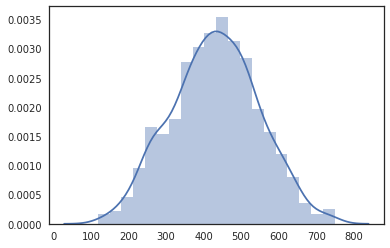

In [13]:
sns.distplot(winter_dist)

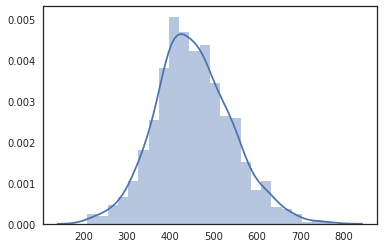

In [14]:
sns.distplot(summer_dist)